# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import re
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

## Load and display the data

In [2]:
data=pd.read_csv('Tweets.csv')
print(data.head(3))
y=pd.read_csv('./ground_truth.csv',header=None)
print(y.head(3))

                       created_at            id        id_str  \
0  Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2  Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   

                                                text  truncated  \
0  RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1  RT @VenomMovie: The world has enough superhero...      False   
2  RT @FutbolBible: Teachers vs Students match &a...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [{'text': 'Venom', 'indices': [64...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                            metadata  \
0  {'iso_language_code': 'en', 'result_type': 're...   
1  {'iso_language_code': 'en', 'result_type': 're...   
2  {'iso_language_code': 'en', 'result_type': 're...   

                    

In [3]:
X = data.filter(['user_followers_count','retweet_count','user_statuses_count'], axis=1)
print(X.head(10))

   user_followers_count  retweet_count  user_statuses_count
0                   153            113                31308
1                   780           5902                87272
2                   255           3745                 1731
3                  2419             10                 2153
4                   314          25306                33503
5                   577           1602                11902
6                    11              0                  220
7                   820              1                 5024
8                  1111              1                 1584
9                  1267              0                 1189


In [4]:
X=np.array(X)
y=np.array(y).ravel()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

metaX_train=X_train
metaX_test=X_test


In [6]:

def MajorityVote(indices, train_labels):
    labels = [train_labels[i] for i in indices]
    labels = np.array(labels)
    majority = mode(labels, axis=-1, keepdims=True)
    majority = majority[0].ravel()
    
    return majority

In [7]:

K_range = range(1, 52, 2)
test_accuracy = []
for n in K_range:
    neigh = NearestNeighbors(n_neighbors=n)
    neigh.fit(X_train)
    _, indices = neigh.kneighbors(X_test)
    predicted = MajorityVote(indices, y_train)
    accuracy = accuracy_score(y_test, predicted, normalize=True)
    accuracy =accuracy * float(100)
    test_accuracy.append(accuracy)
  
    print("\nTesting accuracy for K=",n," is ",accuracy)
   


Testing accuracy for K= 1  is  94.45945945945947

Testing accuracy for K= 3  is  94.77477477477477

Testing accuracy for K= 5  is  95.04504504504504

Testing accuracy for K= 7  is  94.95495495495496

Testing accuracy for K= 9  is  95.27027027027027

Testing accuracy for K= 11  is  95.18018018018019

Testing accuracy for K= 13  is  95.13513513513514

Testing accuracy for K= 15  is  95.31531531531532

Testing accuracy for K= 17  is  95.27027027027027

Testing accuracy for K= 19  is  95.22522522522523

Testing accuracy for K= 21  is  95.18018018018019

Testing accuracy for K= 23  is  95.13513513513514

Testing accuracy for K= 25  is  95.31531531531532

Testing accuracy for K= 27  is  95.31531531531532

Testing accuracy for K= 29  is  95.27027027027027

Testing accuracy for K= 31  is  95.18018018018019

Testing accuracy for K= 33  is  95.18018018018019

Testing accuracy for K= 35  is  95.13513513513514

Testing accuracy for K= 37  is  95.04504504504504

Testing accuracy for K= 39  is  94.

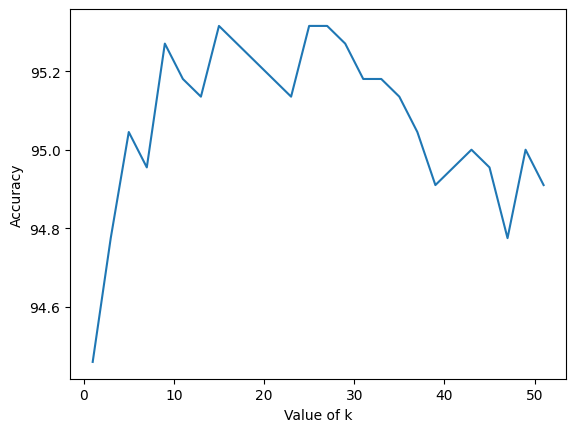

In [8]:
plt.plot(K_range, test_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Value of k")
plt.show()

In [9]:
print("minimum accuracy is ",min(test_accuracy))
print("minimum accuracy K value is ",K_range[np.argmin(test_accuracy)])

print("maximum accuracy is ",max(test_accuracy))
print("maximum accuracy K value is ",K_range[np.argmax(test_accuracy)])

part1k=K_range[np.argmax(test_accuracy)]
part1acc=max(test_accuracy)

minimum accuracy is  94.45945945945947
minimum accuracy K value is  1
maximum accuracy is  95.31531531531532
maximum accuracy K value is  15


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

## Part-1
*Vectorize tweets using only meta data*

In [10]:


def get_features():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """

  # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [11]:
# your code here

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [12]:
def tweet_vectoriser():
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [13]:
tweets = data["text"]

In [14]:


processed_tweets = []


for tweet in range(0, len(tweets)):  
   

    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', str(tweets[tweet])) # remove all single characters
    processed_tweet = re.sub("@[A-Za-z0-9_]+","", processed_tweet)#removing mentions
    processed_tweet = re.sub("#[A-Za-z0-9_]+","", processed_tweet)#removing hastag
    processed_tweet = re.sub("[0-9][0-9A-Za-z]*","", processed_tweet)#removing starting with digits
    processed_tweet = re.sub("[^0-9A-Za-z \t]*","", processed_tweet) #remove special characters
    processed_tweet = re.sub("http\S+","", processed_tweet)#removing links
    processed_tweet = processed_tweet.lower() # Converting to Lowercase
    processed_tweets.append(processed_tweet)
    
#     print(processed_tweet)
    
    

In [15]:

tfidfconverter = TfidfVectorizer(max_features=None,analyzer='word',max_df=0.7, stop_words="english"  )

X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [16]:

principal=PCA(n_components=25)
principal.fit(X)
X=principal.transform(X)


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
tfidfX_train=X_train
tfidfX_test=X_test

In [18]:

K_range = range(1, 52, 2)
test_accuracy = []
for n in K_range:
    neigh = NearestNeighbors(n_neighbors=n)
    neigh.fit(X_train)
    _, indices = neigh.kneighbors(X_test)
    predicted = MajorityVote(indices, y_train)
    accuracy = accuracy_score(y_test, predicted, normalize=True)
    accuracy = accuracy * float(100)
    test_accuracy.append(accuracy)
  
    print("\nTest accuracy for k=",n," is ",accuracy)


Test accuracy for k= 1  is  91.30630630630631

Test accuracy for k= 3  is  92.88288288288288

Test accuracy for k= 5  is  93.46846846846847

Test accuracy for k= 7  is  93.1981981981982

Test accuracy for k= 9  is  93.01801801801803

Test accuracy for k= 11  is  92.97297297297298

Test accuracy for k= 13  is  92.7927927927928

Test accuracy for k= 15  is  92.97297297297298

Test accuracy for k= 17  is  93.01801801801803

Test accuracy for k= 19  is  92.92792792792793

Test accuracy for k= 21  is  92.7027027027027

Test accuracy for k= 23  is  92.52252252252252

Test accuracy for k= 25  is  92.56756756756756

Test accuracy for k= 27  is  92.43243243243244

Test accuracy for k= 29  is  92.43243243243244

Test accuracy for k= 31  is  92.43243243243244

Test accuracy for k= 33  is  92.43243243243244

Test accuracy for k= 35  is  92.43243243243244

Test accuracy for k= 37  is  92.43243243243244

Test accuracy for k= 39  is  92.43243243243244

Test accuracy for k= 41  is  92.16216216216216


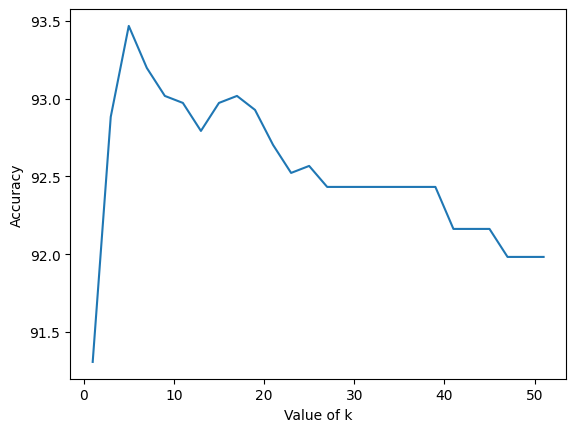

In [19]:
plt.plot(K_range, test_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Value of k")
plt.show()

In [20]:
print("minimum accuracy is ",min(test_accuracy))
print("minimum accuracy K value is ",K_range[np.argmin(test_accuracy)])

print("maximum accuracy is ",max(test_accuracy))
print("maximum accuracy K value is ",K_range[np.argmax(test_accuracy)])

part2k=K_range[np.argmax(test_accuracy)]
part2acc=max(test_accuracy)

minimum accuracy is  91.30630630630631
minimum accuracy K value is  1
maximum accuracy is  93.46846846846847
maximum accuracy K value is  5


## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [21]:

metaX_train=pd.DataFrame(metaX_train)
metaX_test=pd.DataFrame(metaX_test)
tfidfX_train=pd.DataFrame(tfidfX_train)
tfidfX_test=pd.DataFrame(tfidfX_test)

X_train=pd.concat([metaX_train,tfidfX_train],axis=1)
X_test=pd.concat([metaX_test,tfidfX_test],axis=1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8879, 28)
(2220, 28)
(8879,)
(2220,)


In [22]:
K_range = range(1, 52, 2)
test_accuracy = []
for n in K_range:
    neigh = NearestNeighbors(n_neighbors=n)
    neigh.fit(X_train)
    _, indices = neigh.kneighbors(X_test)
    predicted = MajorityVote(indices, y_train)
    accuracy = accuracy_score(y_test, predicted, normalize=True)
    accuracy = accuracy * float(100)
    test_accuracy.append(accuracy)
  
    print("\nTest accuracy for k=",n," is ",accuracy)


Test accuracy for k= 1  is  94.36936936936937

Test accuracy for k= 3  is  94.95495495495496

Test accuracy for k= 5  is  95.09009009009009

Test accuracy for k= 7  is  95.13513513513514

Test accuracy for k= 9  is  94.86486486486486

Test accuracy for k= 11  is  94.81981981981981

Test accuracy for k= 13  is  94.90990990990991

Test accuracy for k= 15  is  94.86486486486486

Test accuracy for k= 17  is  94.86486486486486

Test accuracy for k= 19  is  94.77477477477477

Test accuracy for k= 21  is  94.81981981981981

Test accuracy for k= 23  is  94.95495495495496

Test accuracy for k= 25  is  94.86486486486486

Test accuracy for k= 27  is  94.95495495495496

Test accuracy for k= 29  is  94.95495495495496

Test accuracy for k= 31  is  94.95495495495496

Test accuracy for k= 33  is  94.90990990990991

Test accuracy for k= 35  is  95.0

Test accuracy for k= 37  is  94.95495495495496

Test accuracy for k= 39  is  95.09009009009009

Test accuracy for k= 41  is  95.13513513513514

Test accu

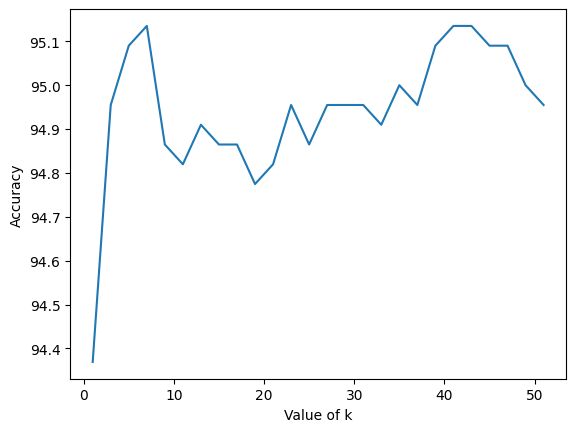

In [23]:
plt.plot(K_range, test_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Value of k")
plt.show()

In [24]:
print("minimum accuracy is ",min(test_accuracy))
print("minimum accuracy K value is ",K_range[np.argmin(test_accuracy)])

print("maximum accuracy is ",max(test_accuracy))
print("maximum accuracy K value is ",K_range[np.argmax(test_accuracy)])

part3k=K_range[np.argmax(test_accuracy)]
part3acc=max(test_accuracy)


minimum accuracy is  94.36936936936937
minimum accuracy K value is  1
maximum accuracy is  95.13513513513514
maximum accuracy K value is  7


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [25]:


print("maximum accuracy for part-1 is ",part1acc)
print("maximum accuracy K value for part-1 is ",part1k)



print("maximum accuracy for part-2 is ",part2acc)
print("maximum accuracy K value for part-2 is ",part2k)



print("maximum accuracy for part-3 is ",part3acc)
print("maximum accuracy K value for part-3 is ",part3k)

maximum accuracy for part-1 is  95.31531531531532
maximum accuracy K value for part-1 is  15
maximum accuracy for part-2 is  93.46846846846847
maximum accuracy K value for part-2 is  5
maximum accuracy for part-3 is  95.13513513513514
maximum accuracy K value for part-3 is  7


### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.